In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

In [28]:
s = ['Mars has an athmosphere', "Saturn 's moon Titan has its own athmosphere",
     'Mars has two moons', 'Saturn has many moons', 'Io has cryo-vulcanoes']
dic = {}
for sent in s:
    words = sent.split()
    for w in words:
        if w not in dic:
            dic[w] = {}
        for w2 in words:
            dic[w][w2]=1

In [29]:
df = pd.DataFrame(dic)
df.fillna(0, inplace=True)
df

,'s,Io,Mars,Saturn,Titan,an,athmosphere,cryo-vulcanoes,has,its,many,moon,moons,own,two
's,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0
Io,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0
Mars,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
Saturn,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,0.0
Titan,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0
an,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
athmosphere,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0
cryo-vulcanoes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0
has,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0
its,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:
df.shape

(15, 15)

In [31]:
pca = PCA()
res = pca.fit_transform(df)

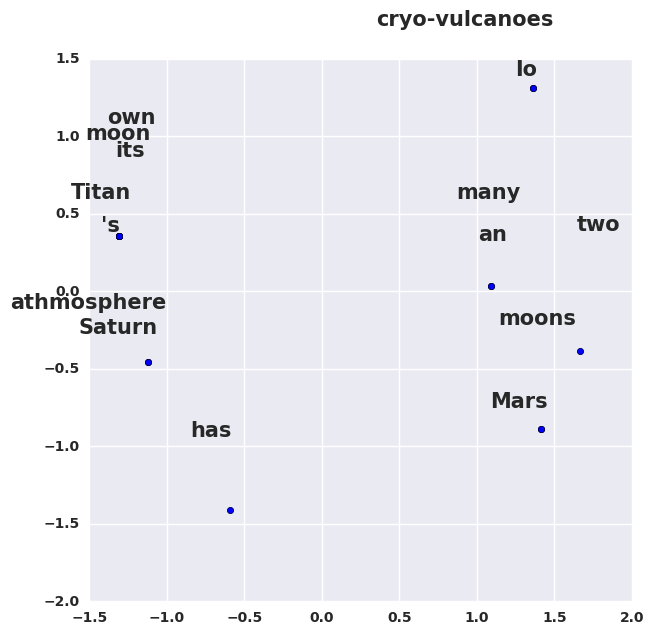

In [32]:
plt.figure(figsize=(7,7))
plt.scatter(res[:,0], res[:,1])
for i, label in enumerate(df.columns):
    x, y = res[i,0], res[i,1]
    plt.scatter(x, y)
    kek = {'has': (1, 50), 'is': (1, 5)}
    plt.annotate(label, xy=(x, y), xytext=kek.get(label,(1+i*2, 6*i)), textcoords='offset points',
                   ha='right', va='bottom', )